<a href="https://www.kaggle.com/code/zjzhao1002/used-car-prices-xgb?scriptVersionId=195515857" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Data Loading and Basic Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        -------------- 

In [5]:
df_train.shape, df_test.shape

((188533, 13), (125690, 12))

# 2. Data Cleaning

In [6]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


Firstly, we look at the 'fuel_type' column:

In [7]:
df_train['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

The '–' and 'not supported' are meaningless, we combine them with nan and fill a value 'none'.

In [8]:
df_train['fuel_type'].fillna('none', inplace=True)
df_train['fuel_type'].replace({'–': 'none', 'not supported': 'none'}, inplace=True)

/tmp/ipykernel_17/2615226899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['fuel_type'].fillna('none', inplace=True)


Do the same thing to the test dataset.

In [9]:
df_test['fuel_type'].fillna('none', inplace=True)
df_test['fuel_type'].replace({'–': 'none', 'not supported': 'none'}, inplace=True)

/tmp/ipykernel_17/1365002684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['fuel_type'].fillna('none', inplace=True)


Secondly, we look at the 'accident' column.

In [10]:
df_train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

nan can be treated as 'None reported', too. We fill nan by this value.

In [11]:
df_train['accident'].fillna('None reported', inplace=True)
df_test['accident'].fillna('None reported', inplace=True)

/tmp/ipykernel_17/3732693662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['accident'].fillna('None reported', inplace=True)
/tmp/ipykernel_17/3732693662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Thirdly, we look at the 'clean_title' column:

In [12]:
df_train['clean_title'].unique()

array(['Yes', nan], dtype=object)

We may just fill nan by a 'No'.

In [13]:
df_train['clean_title'].fillna('No', inplace=True)
df_test['clean_title'].fillna('No', inplace=True)

/tmp/ipykernel_17/1497690139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['clean_title'].fillna('No', inplace=True)
/tmp/ipykernel_17/1497690139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Finally, let's check if all nan are gone.

In [14]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


# 3. Features Engineering

Let's have a look to the unique values in categorical columns.

In [15]:
cat_columns = df_train.select_dtypes(include='object').columns
for column in cat_columns:
    print(column, ': ', df_train[column].nunique())

brand :  57
model :  1897
fuel_type :  6
engine :  1117
transmission :  52
ext_col :  319
int_col :  156
accident :  2
clean_title :  2


In [16]:
for column in cat_columns:
    print(df_train[column].value_counts().nlargest(10), '\n****************************')

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Name: count, dtype: int64 
****************************
model
F-150 XLT               2945
M3 Base                 2229
Camaro 2SS              1709
M4 Base                 1622
Mustang GT Premium      1526
F-150 Lariat            1410
E-Class E 350 4MATIC    1357
1500 Laramie            1249
911 Carrera S           1219
Corvette Base           1184
Name: count, dtype: int64 
****************************
fuel_type
Gasoline          165940
Hybrid              6832
none                5879
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
Name: count, dtype: int64 
****************************
engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2902
420.0HP 6

For the 'brand', 'model', 'int_col' and 'ext_col' columns, We want to collect the values that appear less frequently, and treat them as 'Other'.

In [17]:
for column in ['brand', 'model', 'ext_col', 'int_col']:
    count = df_train[column].value_counts()
    less_freq = count[count<101].index
    df_train[column] = df_train[column].apply(lambda x: 'Other' if x in less_freq else x)

In [18]:
for column in ['brand', 'model', 'ext_col', 'int_col']:
    count = df_test[column].value_counts()
    less_freq = count[count<101].index
    df_test[column] = df_test[column].apply(lambda x: 'Other' if x in less_freq else x)

We also see the '–' appears in the 'int_col' columns. This value should be replaced by 'Other', too. We can expect that it appears in the 'ext_col' columns. So we can do:

In [19]:
df_train['int_col'].replace({'–': 'Other'}, inplace=True)
df_train['ext_col'].replace({'–': 'Other'}, inplace=True)

df_test['int_col'].replace({'–': 'Other'}, inplace=True)
df_test['ext_col'].replace({'–': 'Other'}, inplace=True)

/tmp/ipykernel_17/383713271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['int_col'].replace({'–': 'Other'}, inplace=True)
/tmp/ipykernel_17/383713271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

For the 'engine' column, we can split it to three features: 'HP', 'engine_size', and 'cylinder'. However, this may introduce new nan values to the dataset. For the 'HP', we fill these nan by its mean. For the other columns, we fill the most frequent values.

In [20]:
def preprocess_engine(df):
    df['HP'] = df['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
    df['engine_size'] = df['engine'].str.extract('(\d+\.?\d*)L').astype(float)
    df['cylinder'] = df['engine'].str.extract('(\d+)\s*Cylinder').astype(float)
    
    df['HP'] = df['HP'].fillna(round(df['HP'].mean(), 1))
    df['engine_size'] = df['engine_size'].fillna(df['engine_size'].value_counts().index[0])
    df['cylinder'] = df['cylinder'].fillna(df['cylinder'].value_counts().index[0])
    
    return df

In [21]:
df_train = preprocess_engine(df_train)
df_test = preprocess_engine(df_test)

The 'transmission' can be simplified to 'Automatic', 'Manual' or 'Other'.

In [22]:
df_train['simplified_transmission'] = df_train['transmission'].apply(
    lambda x: 'Automatic' if 'A/T' in x or 'Automatic' in x
    else ('Manual' if 'M/T' in x or 'Manual' in x else 'Other')
)

In [23]:
df_test['simplified_transmission'] = df_test['transmission'].apply(
    lambda x: 'Automatic' if 'A/T' in x or 'Automatic' in x
    else ('Manual' if 'M/T' in x or 'Manual' in x else 'Other')
)

In [24]:
num_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['id', 'model_year', 'milage', 'price', 'HP', 'engine_size', 'cylinder'], dtype='object')

For numeric columns, we can replace the 'model_year' by the car age. Numbers in 'milage' are large. We may divide them by 1000.

In [25]:
df_train['car_age'] = 2024 - df_train['model_year']
df_train['milage'] = df_train['milage'] / 1000.0

In [26]:
df_test['car_age'] = 2024 - df_train['model_year']
df_test['milage'] = df_train['milage'] / 1000.0

Finally, we store the features for training to a new dataframe.

In [27]:
X = df_train.drop(['id', 'engine', 'model_year', 'transmission'], axis=1).copy()
y = X.pop('price')

X_test = df_test.drop(['id', 'engine', 'model_year', 'transmission'], axis=1).copy()

We can also calculate the mutual information (MI) scores at this stage.

In [28]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [29]:
make_mi_scores(X, y)

milage                     0.660457
car_age                    0.542215
HP                         0.537590
model                      0.340010
engine_size                0.197412
clean_title                0.161416
ext_col                    0.160626
brand                      0.151625
int_col                    0.130926
cylinder                   0.095011
accident                   0.060162
simplified_transmission    0.033723
fuel_type                  0.027829
Name: MI Scores, dtype: float64

# 4. Data Visualisation

In [30]:
def make_barplot(df):
    cat_columns = df.select_dtypes(include='object').columns
    for column in cat_columns:
        plt.figure(figsize=(10, 5))
        uni_count = df[column].value_counts().nlargest(10)
        sns.barplot(x=uni_count.index, y=uni_count.values)
        plt.ylabel(f"Count of '{column}'")
        plt.xlabel(f"{column}")
        plt.title(f"Count of unique categories in column '{column}'")
        plt.show()

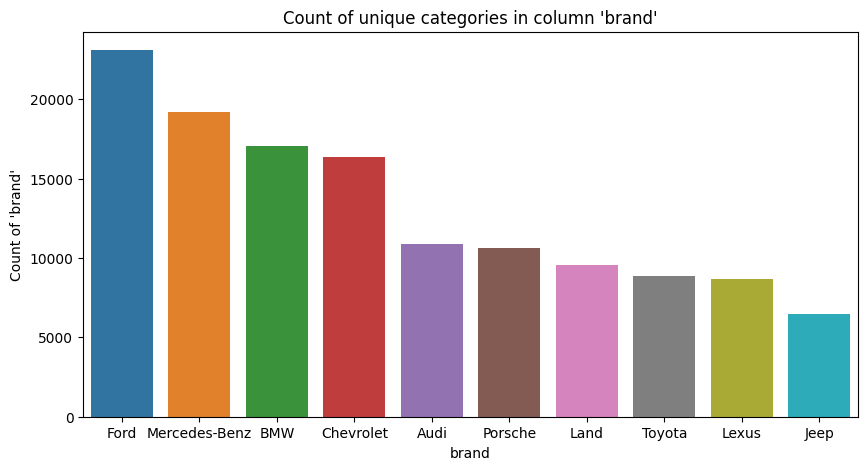

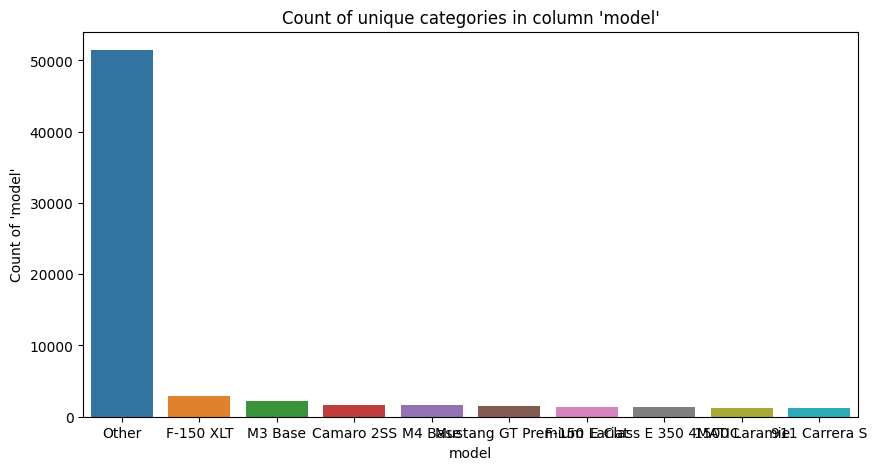

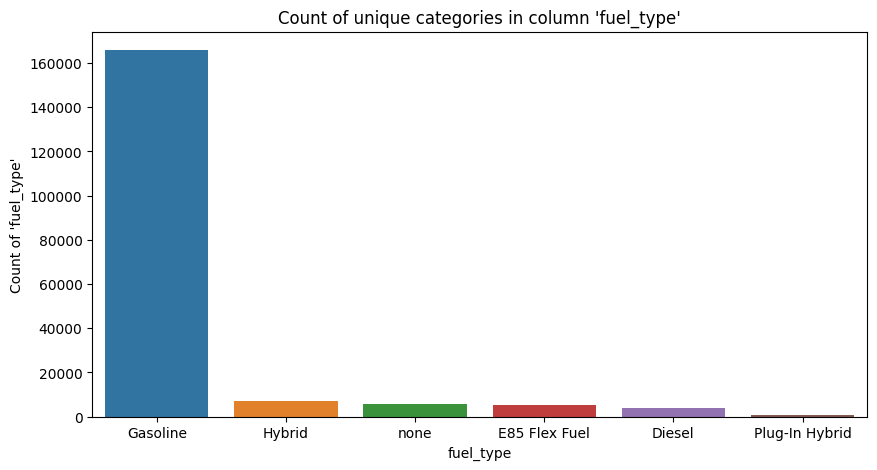

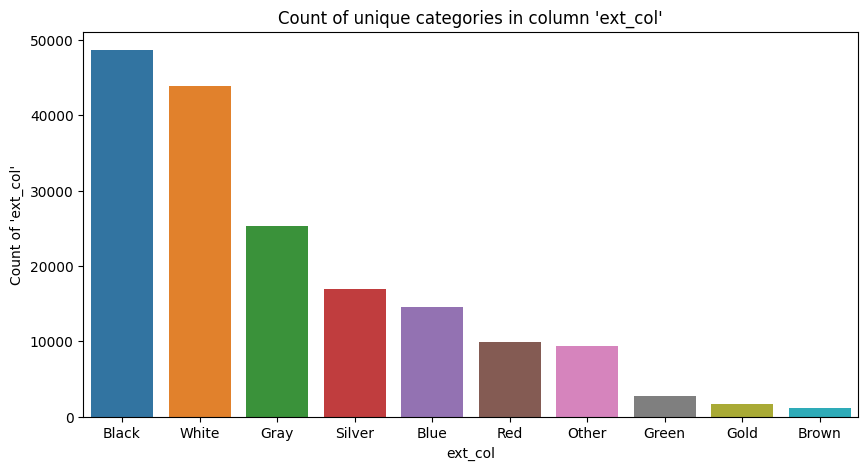

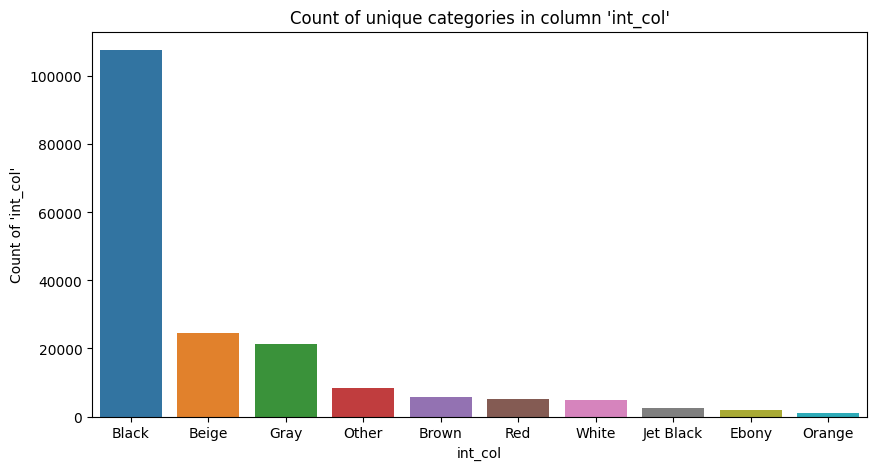

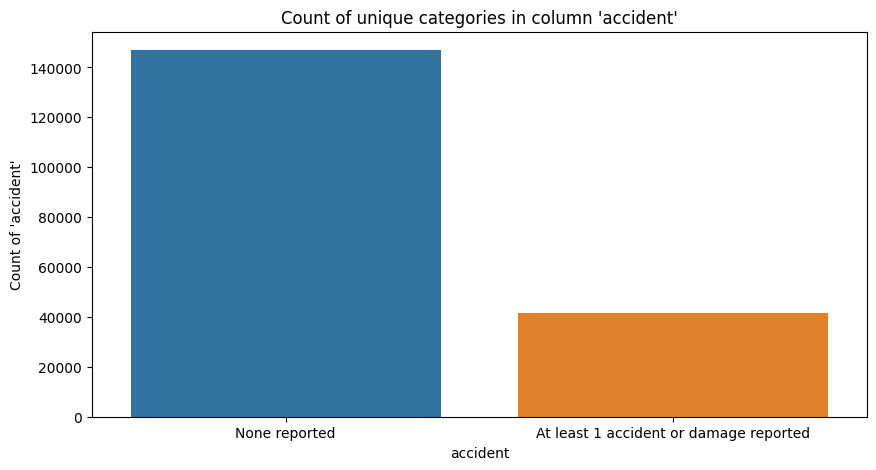

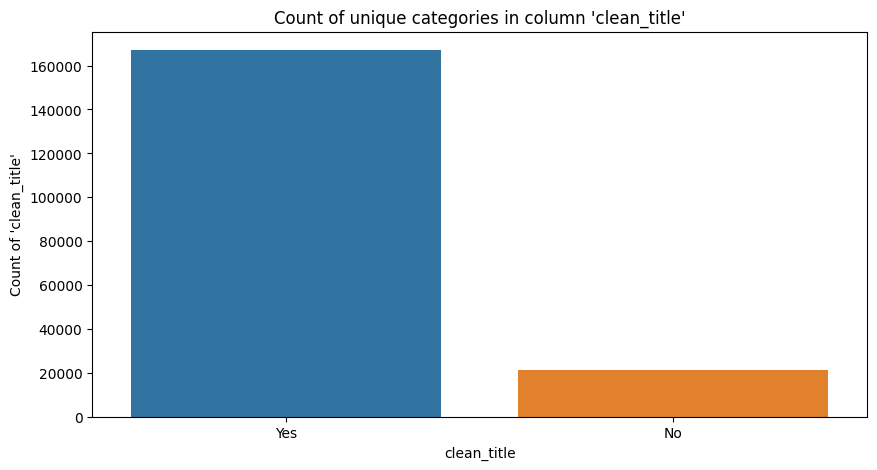

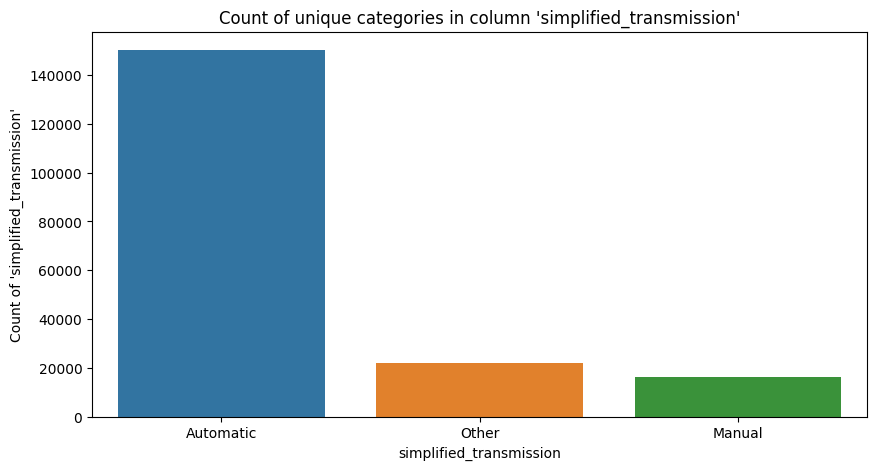

In [31]:
make_barplot(X)

In [32]:
def make_hist(df):
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in num_columns:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.hist(df[column].to_numpy())
        ax.legend()
        ax.set_xlabel(f'{column}')
        ax.set_ylabel('Fraction of data')
        plt.show()

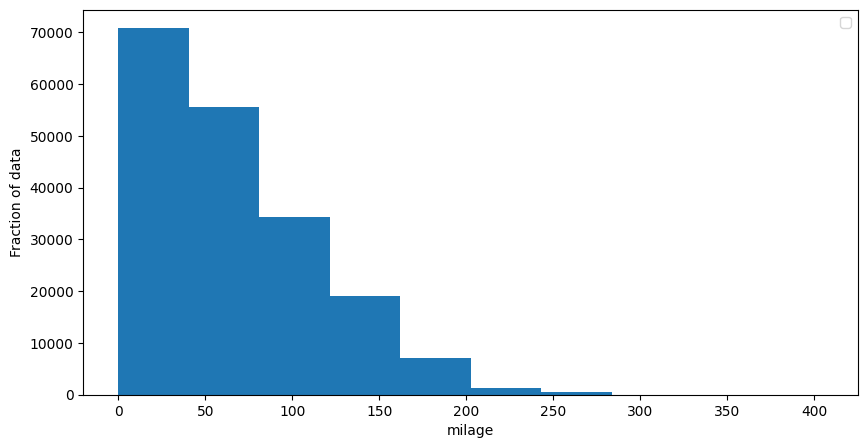

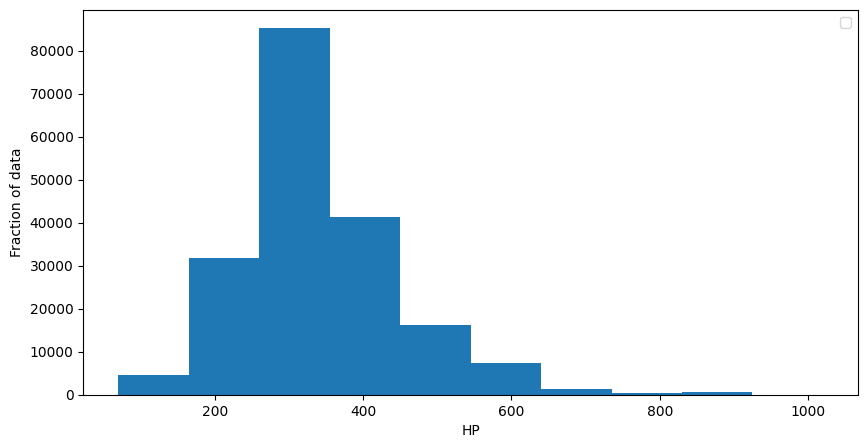

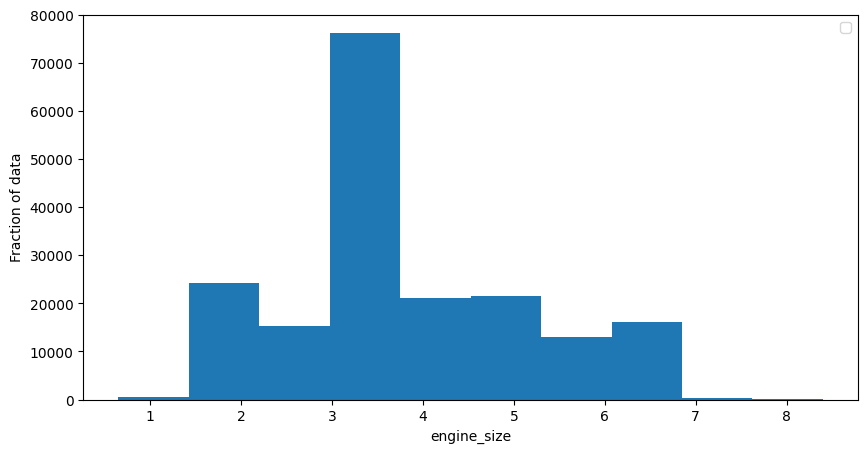

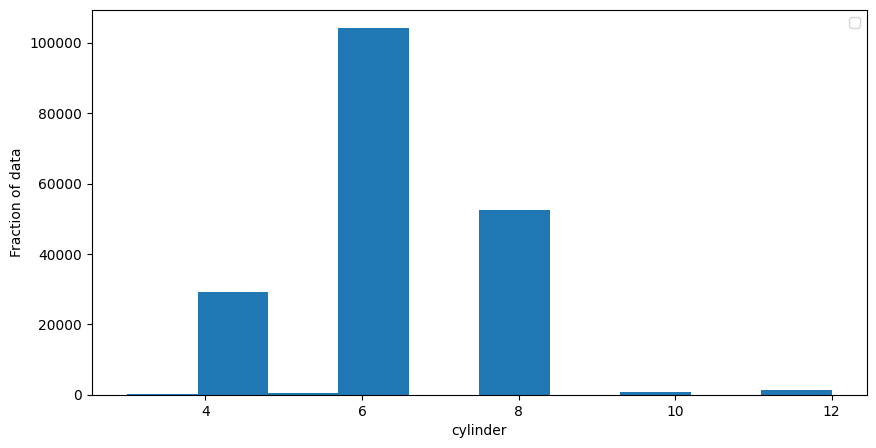

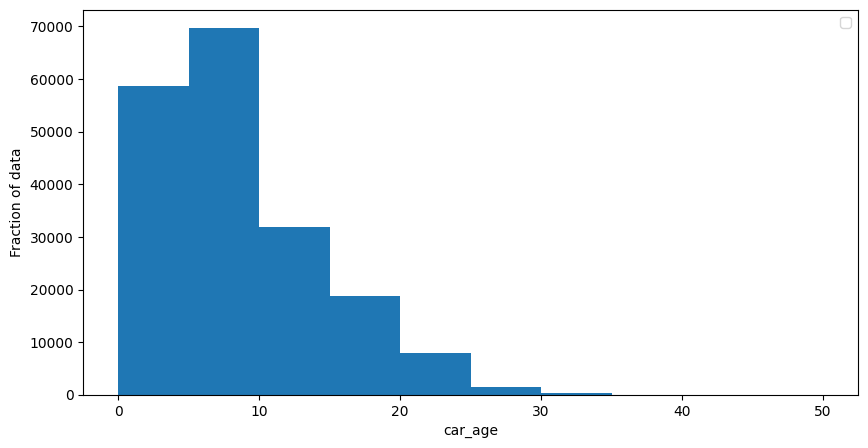

In [33]:
make_hist(X)

# 5. Model

The catagorical columns need to be encoded before training.

In [34]:
from sklearn.preprocessing import LabelEncoder

def encoding(df):
    cat_columns = df.select_dtypes(include='object').columns
    
    encoder = LabelEncoder()
    for column in cat_columns:
        df[column] = encoder.fit_transform(df[column].astype(str))
    
    return df

In [35]:
X = encoding(X)
X_test = encoding(X_test)

We also scale the numeric columns.

In [36]:
from sklearn.preprocessing import StandardScaler

def scaling(df):
    num_columns = ['milage', 'HP', 'car_age'] #Only scale these three columns
    scaler = StandardScaler()
    df[num_columns] = scaler.fit_transform(df[num_columns])
    return df

In [37]:
X = scaling(X)
X_test = scaling(X_test)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1
)

We use XGBoost model to do regression, and use Optuna to do fine-tuning.

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    xgb_params = dict(
        objective='reg:squarederror', 
        eval_metric='rmse', 
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    return rmse

In [40]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

[I 2024-09-06 01:22:46,469] A new study created in memory with name: no-name-bd17562c-31b1-46ec-ad17-3fd4f235bae9
[I 2024-09-06 01:23:31,712] Trial 0 finished with value: 67555.82678652977 and parameters: {'max_depth': 7, 'learning_rate': 0.07486308689072292, 'n_estimators': 4866, 'min_child_weight': 8, 'colsample_bytree': 0.2781505966783174, 'subsample': 0.6817139391786409, 'reg_alpha': 1.7996590801411518, 'reg_lambda': 0.0001550810012825943}. Best is trial 0 with value: 67555.82678652977.
[I 2024-09-06 01:24:16,650] Trial 1 finished with value: 62486.73833656757 and parameters: {'max_depth': 3, 'learning_rate': 0.0015152428293424831, 'n_estimators': 7652, 'min_child_weight': 5, 'colsample_bytree': 0.6191518428187314, 'subsample': 0.6174139550933557, 'reg_alpha': 1.5173229466669644, 'reg_lambda': 0.001280699480290743}. Best is trial 1 with value: 62486.73833656757.
[I 2024-09-06 01:24:28,028] Trial 2 finished with value: 62919.019767338745 and parameters: {'max_depth': 3, 'learning_ra

In [41]:
best_model = XGBRegressor(**xgb_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.743190476375992, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.033060422976364814, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1915, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = best_model.predict(X_test)

In [43]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e9/sample_submission.csv")

In [44]:
submission['price'] = y_pred

In [45]:
submission.to_csv("my_submission.csv", index=False)